### Data exploration notebook for Kaggle `lish-moa` competition

In [1]:
import pandas as pd

In [27]:
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [36]:
import matplotlib.pyplot as plt

In [2]:
tf_df = pd.read_csv('train_features.csv')
tf_df.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


### 0-771 gene expression features, 0-99 cell viability features

In [3]:
(tf_df.loc[:,'g-0':'g-771'].min()).min()

-10.0

In [4]:
(tf_df.loc[:,'g-0':'g-771'].max()).max()

10.0

In [5]:
tf_df.loc[:,'g-0':'g-771'].min()

g-0      -5.513
g-1      -5.737
g-2      -9.104
g-3      -5.998
g-4      -6.369
          ...  
g-767   -10.000
g-768    -4.269
g-769   -10.000
g-770   -10.000
g-771   -10.000
Length: 772, dtype: float64

In [6]:
tf_df.loc[:,'g-0':'g-771'].max()

g-0      10.000
g-1       5.039
g-2       8.257
g-3      10.000
g-4      10.000
          ...  
g-767     6.317
g-768    10.000
g-769     5.911
g-770    10.000
g-771    10.000
Length: 772, dtype: float64

In [7]:
print((tf_df.loc[:,'c-0':'c-99'].min()).min(),(tf_df.loc[:,'c-0':'c-99'].max()).max())

-10.0 6.412


In [8]:
tts_df = pd.read_csv('train_targets_scored.csv')
tts_df.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
tts_df.min()

sig_id                                   id_000644bb2
5-alpha_reductase_inhibitor                         0
11-beta-hsd1_inhibitor                              0
acat_inhibitor                                      0
acetylcholine_receptor_agonist                      0
                                             ...     
ubiquitin_specific_protease_inhibitor               0
vegfr_inhibitor                                     0
vitamin_b                                           0
vitamin_d_receptor_agonist                          0
wnt_inhibitor                                       0
Length: 207, dtype: object

In [10]:
tts_df.max()

sig_id                                   id_ffffdd77b
5-alpha_reductase_inhibitor                         1
11-beta-hsd1_inhibitor                              1
acat_inhibitor                                      1
acetylcholine_receptor_agonist                      1
                                             ...     
ubiquitin_specific_protease_inhibitor               1
vegfr_inhibitor                                     1
vitamin_b                                           1
vitamin_d_receptor_agonist                          1
wnt_inhibitor                                       1
Length: 207, dtype: object

### 206 targets

In [11]:
len(tf_df)

23814

### 3982 values in test set

In [12]:
tf_df['cp_dose'].unique()

array(['D1', 'D2'], dtype=object)

According to the competition website these dose codes map to "(high or low)", unknown whether in that order. That can be a first task: determine whether the distributions on the D1 dose rate with constant dose time and type (i.e., not control) are similar to D2 or more or less extreme.

Even before that, I should figure out how many of each sig_id there are.

In [13]:
tf_df['sig_id'].nunique()

23814

That's... unexpected. We don't have any way of identifying the same compound given at differing dose rates or durations.

In [14]:
print(tf_df[tf_df['cp_dose']=='D1']['g-0'].min(),tf_df[tf_df['cp_dose']=='D1']['g-0'].max())

-5.42 10.0


In [15]:
print(tf_df[tf_df['cp_dose']=='D2']['g-0'].min(),tf_df[tf_df['cp_dose']=='D2']['g-0'].max())

-5.513 10.0


In [16]:
print(tf_df[tf_df['cp_dose']=='D1']['c-0'].min(),tf_df[tf_df['cp_dose']=='D1']['c-0'].max())
print(tf_df[tf_df['cp_dose']=='D2']['c-0'].min(),tf_df[tf_df['cp_dose']=='D2']['c-0'].max())

-10.0 2.989
-10.0 3.365


At some point we'll look for differences in handling different dose amounts and frequencies. Let's work with the most common combination. Hmmm... a little bit of Pandas research to identify that.

In [17]:
tf_df.columns

Index(['sig_id', 'cp_type', 'cp_time', 'cp_dose', 'g-0', 'g-1', 'g-2', 'g-3',
       'g-4', 'g-5',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=876)

In [18]:
tf_df.cp_type.unique()

array(['trt_cp', 'ctl_vehicle'], dtype=object)

In [24]:
for trial in tf_df.cp_type.unique():
    print(trial)

trt_cp
ctl_vehicle


In [25]:
for trial in tf_df.cp_type.unique():
    for time in tf_df.cp_time.unique():
        for dose in tf_df.cp_dose.unique():
            print(trial, time, dose, 'Number of experiments: ', 
                  len(tf_df[(tf_df['cp_type']==trial) &
                        (tf_df['cp_time']==time) &
                        (tf_df['cp_dose']==dose)]))

trt_cp 24 D1 Number of experiments:  3585
trt_cp 24 D2 Number of experiments:  3581
trt_cp 72 D1 Number of experiments:  3600
trt_cp 72 D2 Number of experiments:  3580
trt_cp 48 D1 Number of experiments:  4011
trt_cp 48 D2 Number of experiments:  3591
ctl_vehicle 24 D1 Number of experiments:  301
ctl_vehicle 24 D2 Number of experiments:  305
ctl_vehicle 72 D1 Number of experiments:  307
ctl_vehicle 72 D2 Number of experiments:  305
ctl_vehicle 48 D1 Number of experiments:  343
ctl_vehicle 48 D2 Number of experiments:  305


Hrm. Subequal, for better or worse.

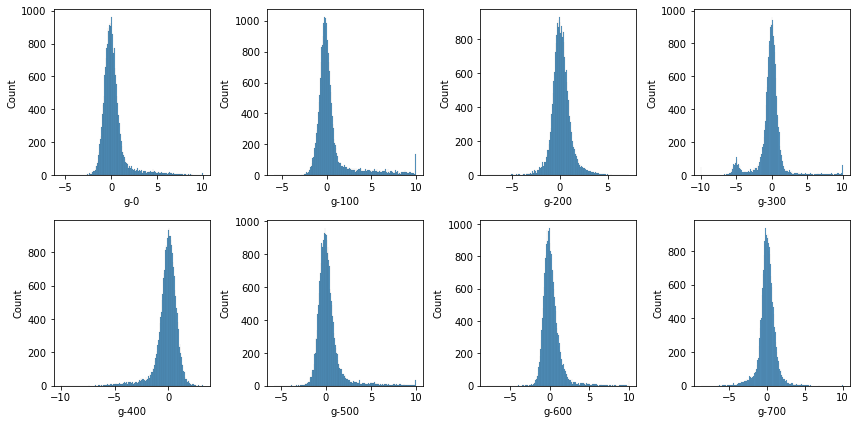

In [44]:
f, axs = plt.subplots(2,4,figsize=(12,6))
for i in range(0,701,100):
    sns.histplot(data=tf_df,x='g-'+str(i),ax=axs[i//400,i%400//100])
f.tight_layout()

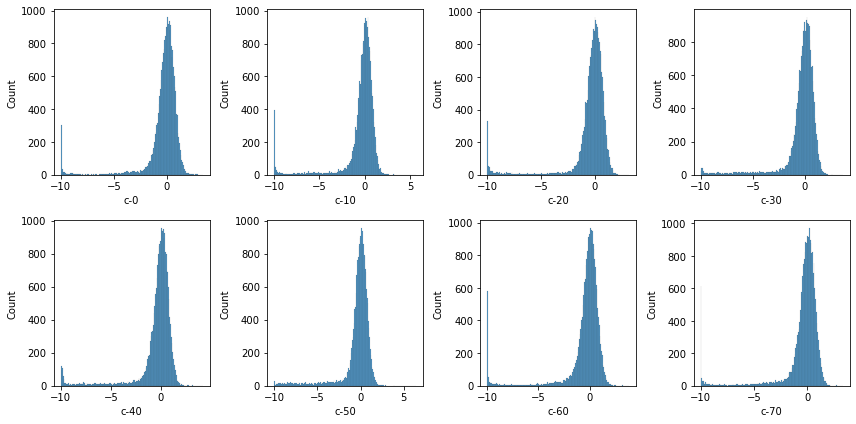

In [45]:
f, axs = plt.subplots(2,4,figsize=(12,6))
for i in range(0,71,10):
    sns.histplot(data=tf_df,x='c-'+str(i),ax=axs[i//40,i%40//10])
f.tight_layout()

In [53]:
corr_df = tf_df.loc[:,'g-0':'c-99'].corr()

In [54]:
len(corr_df)

872

In [55]:
corr_df.iloc[:20,:20]

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152
g-5,-0.165478,-0.151590,0.018516,0.042231,-0.057449,1.000000,0.083620,0.102345,0.073885,0.126561,0.038743,-0.171709,-0.000393,-0.112423,0.073760,0.037763,0.221227,0.033641,0.041073,0.134431
g-6,0.238348,-0.122541,0.015190,-0.043177,0.206405,0.083620,1.000000,0.030544,-0.212292,-0.134739,-0.264575,-0.064363,-0.041731,0.110102,-0.126069,-0.107593,-0.109543,-0.182960,-0.058387,0.070343
g-7,-0.374451,0.144537,-0.144205,-0.175692,-0.032748,0.102345,0.030544,1.000000,0.278085,0.288780,0.382325,-0.184966,0.166101,-0.380687,0.266334,0.141999,0.372104,0.185269,-0.061020,0.121534
g-8,-0.604212,-0.009973,-0.128029,-0.086167,-0.474828,0.073885,-0.212292,0.278085,1.000000,0.330284,0.556854,-0.145569,0.278549,-0.386297,0.417574,-0.078128,0.424483,0.639804,-0.085082,-0.006910
g-9,-0.428779,-0.047558,-0.081332,-0.014052,-0.274167,0.126561,-0.134739,0.288780,0.330284,1.000000,0.423656,-0.182298,0.181920,-0.309551,0.306363,0.099181,0.390175,0.327539,-0.002785,-0.003900


In [56]:
corr_lst = []
for i in range(0,len(corr_df)-1):
    for j in range(len(corr_df)-1,i,-1):
        corr_lst.append(corr_df.iloc[j,i])
len(corr_lst)

379756

<AxesSubplot:ylabel='Count'>

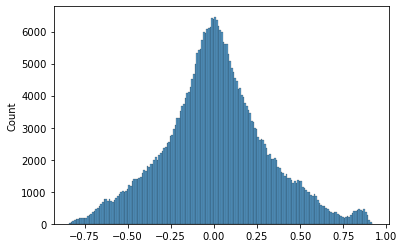

In [58]:
sns.histplot(data=corr_lst)

In [60]:
len(corr_df.mean())

872

In [61]:
type(corr_df.mean())

pandas.core.series.Series

In [62]:
corr_df.mean().min()

-0.09119751260973122

In [63]:
corr_df.mean().max()

0.10080946303397952

In [64]:
corr_df.mean().abs().min()

2.866076348463301e-05

<AxesSubplot:ylabel='Count'>

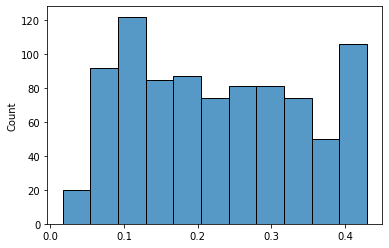

In [66]:
sns.histplot(data=corr_df.abs().mean())